## Combination figures

This notebook contains combination figures of the analysis plots in the other figure files and analysis notebook.


In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt

from Experiment import Experiment
from figure_functions import prediction_compare_plot, latent_space_plot, training_loss_epochs_plot, generate_GL_plot
from figure_functions import get_plot_options

full_params, half_params = get_plot_options()

In [2]:
# How to load up the different experiments for analysis
s0 = Experiment(experiment_name="Sys0-Paper-Experiment", data_file_prefix='S0-Oscillator')
s1 = Experiment(experiment_name="Sys1-Paper-Experiment", data_file_prefix='S1-NLSL1')
s2 = Experiment(experiment_name="Sys2-Paper-Experiment", data_file_prefix='S2-NLSL2')

# In general we'll use the "System 0" basic example system data for plotting the figure below
# although you could set s1, s2, or any other experiment here:
expt = s0

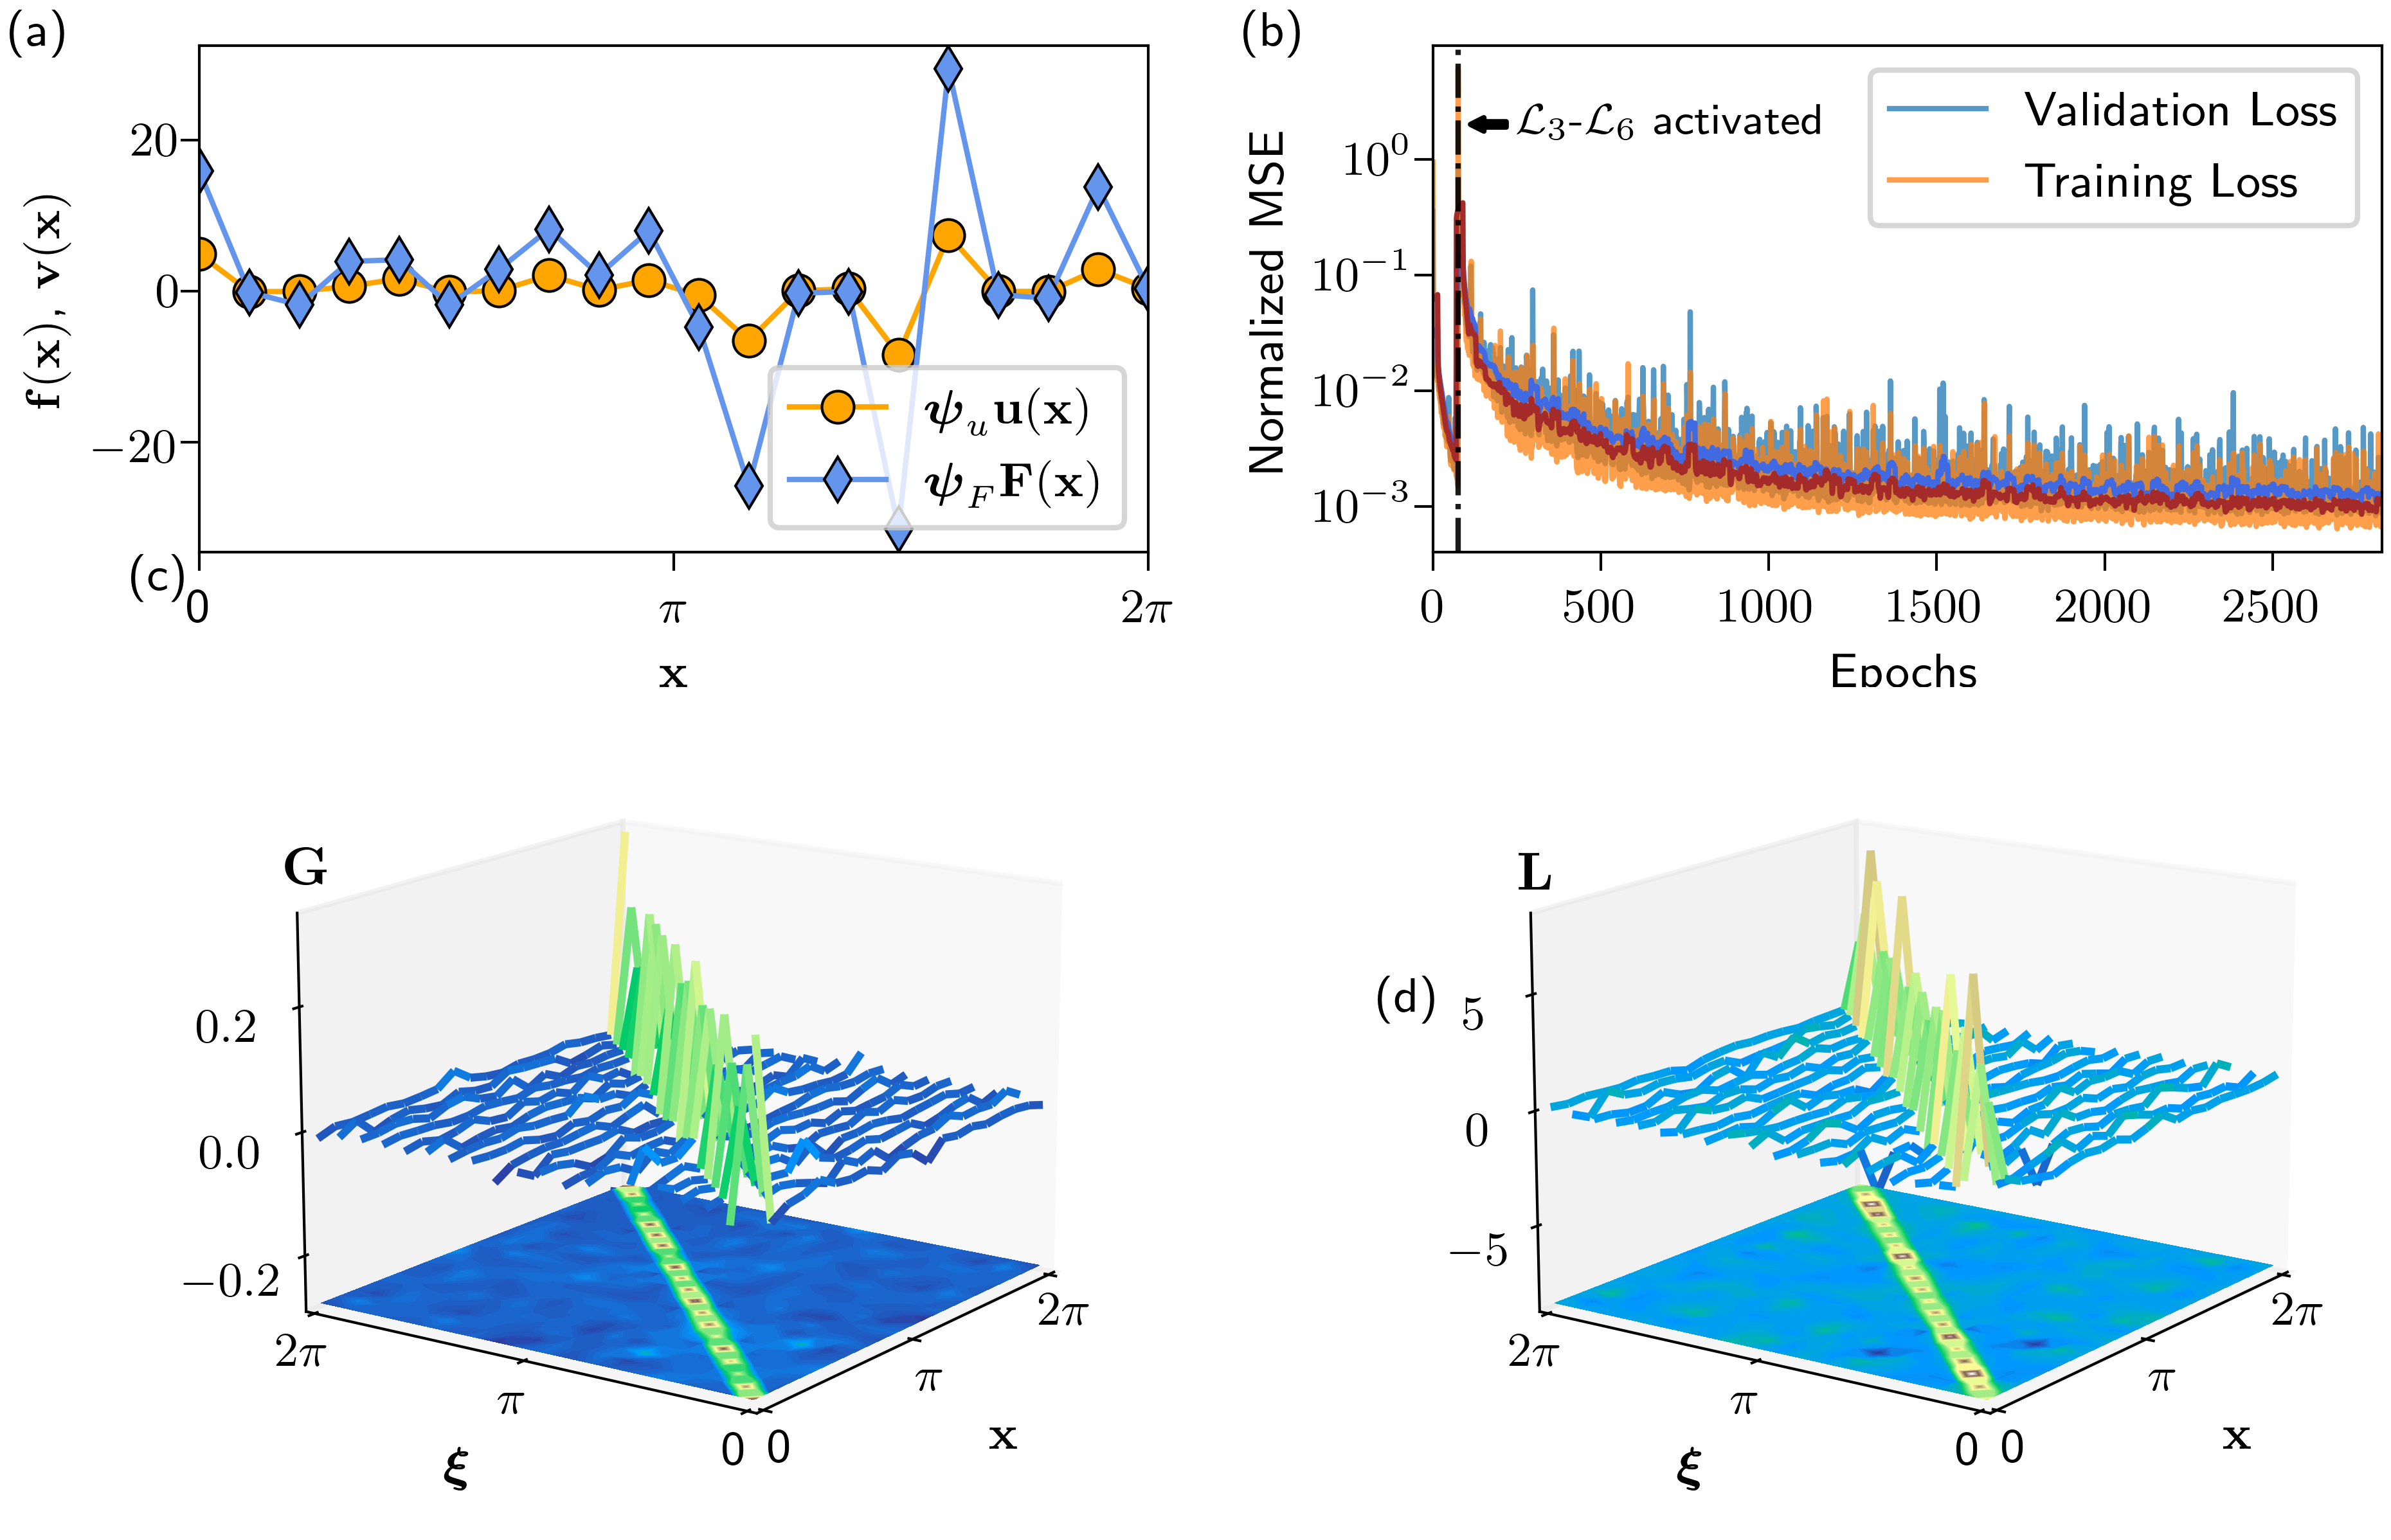

In [3]:
## These are combination figures of the above figures:

# Set up plotting options:
plt.rcdefaults()
plot_params = half_params.copy()
plot_params['figure.figsize'] = (full_params['figure.figsize'][0],5)
plt.rcParams.update(plot_params)

# set up the axes for the first plot, plot G
fig = plt.figure()
gs = fig.add_gridspec(2, 2, height_ratios=[1.2,2])
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0], projection='3d')
ax4 = fig.add_subplot(gs[1,1], projection='3d')

latent_space_plot(expt, index=14, dataset_name='train1', ax=ax1)
training_loss_epochs_plot(expt, roll_window=20, ax=ax2)
generate_GL_plot(expt, fig=fig, axs=[ax3,ax4])

plt.subplots_adjust(wspace=0.3)

# Add letters to the figure:
letter_opts=dict(weight='bold', fontsize=9)

ax1.text(x=-0.2, y=1, s="(a)", transform=ax1.transAxes, **letter_opts)
ax2.text(x=-0.2, y=1, s="(b)", transform=ax2.transAxes, **letter_opts)
ax3.text(x=0.5, y=3*np.pi, z=0.8, s="(c)", **letter_opts)
ax4.text(x=0.5, y=3*np.pi, z=2.3, s="(d)", **letter_opts)

plt.show()

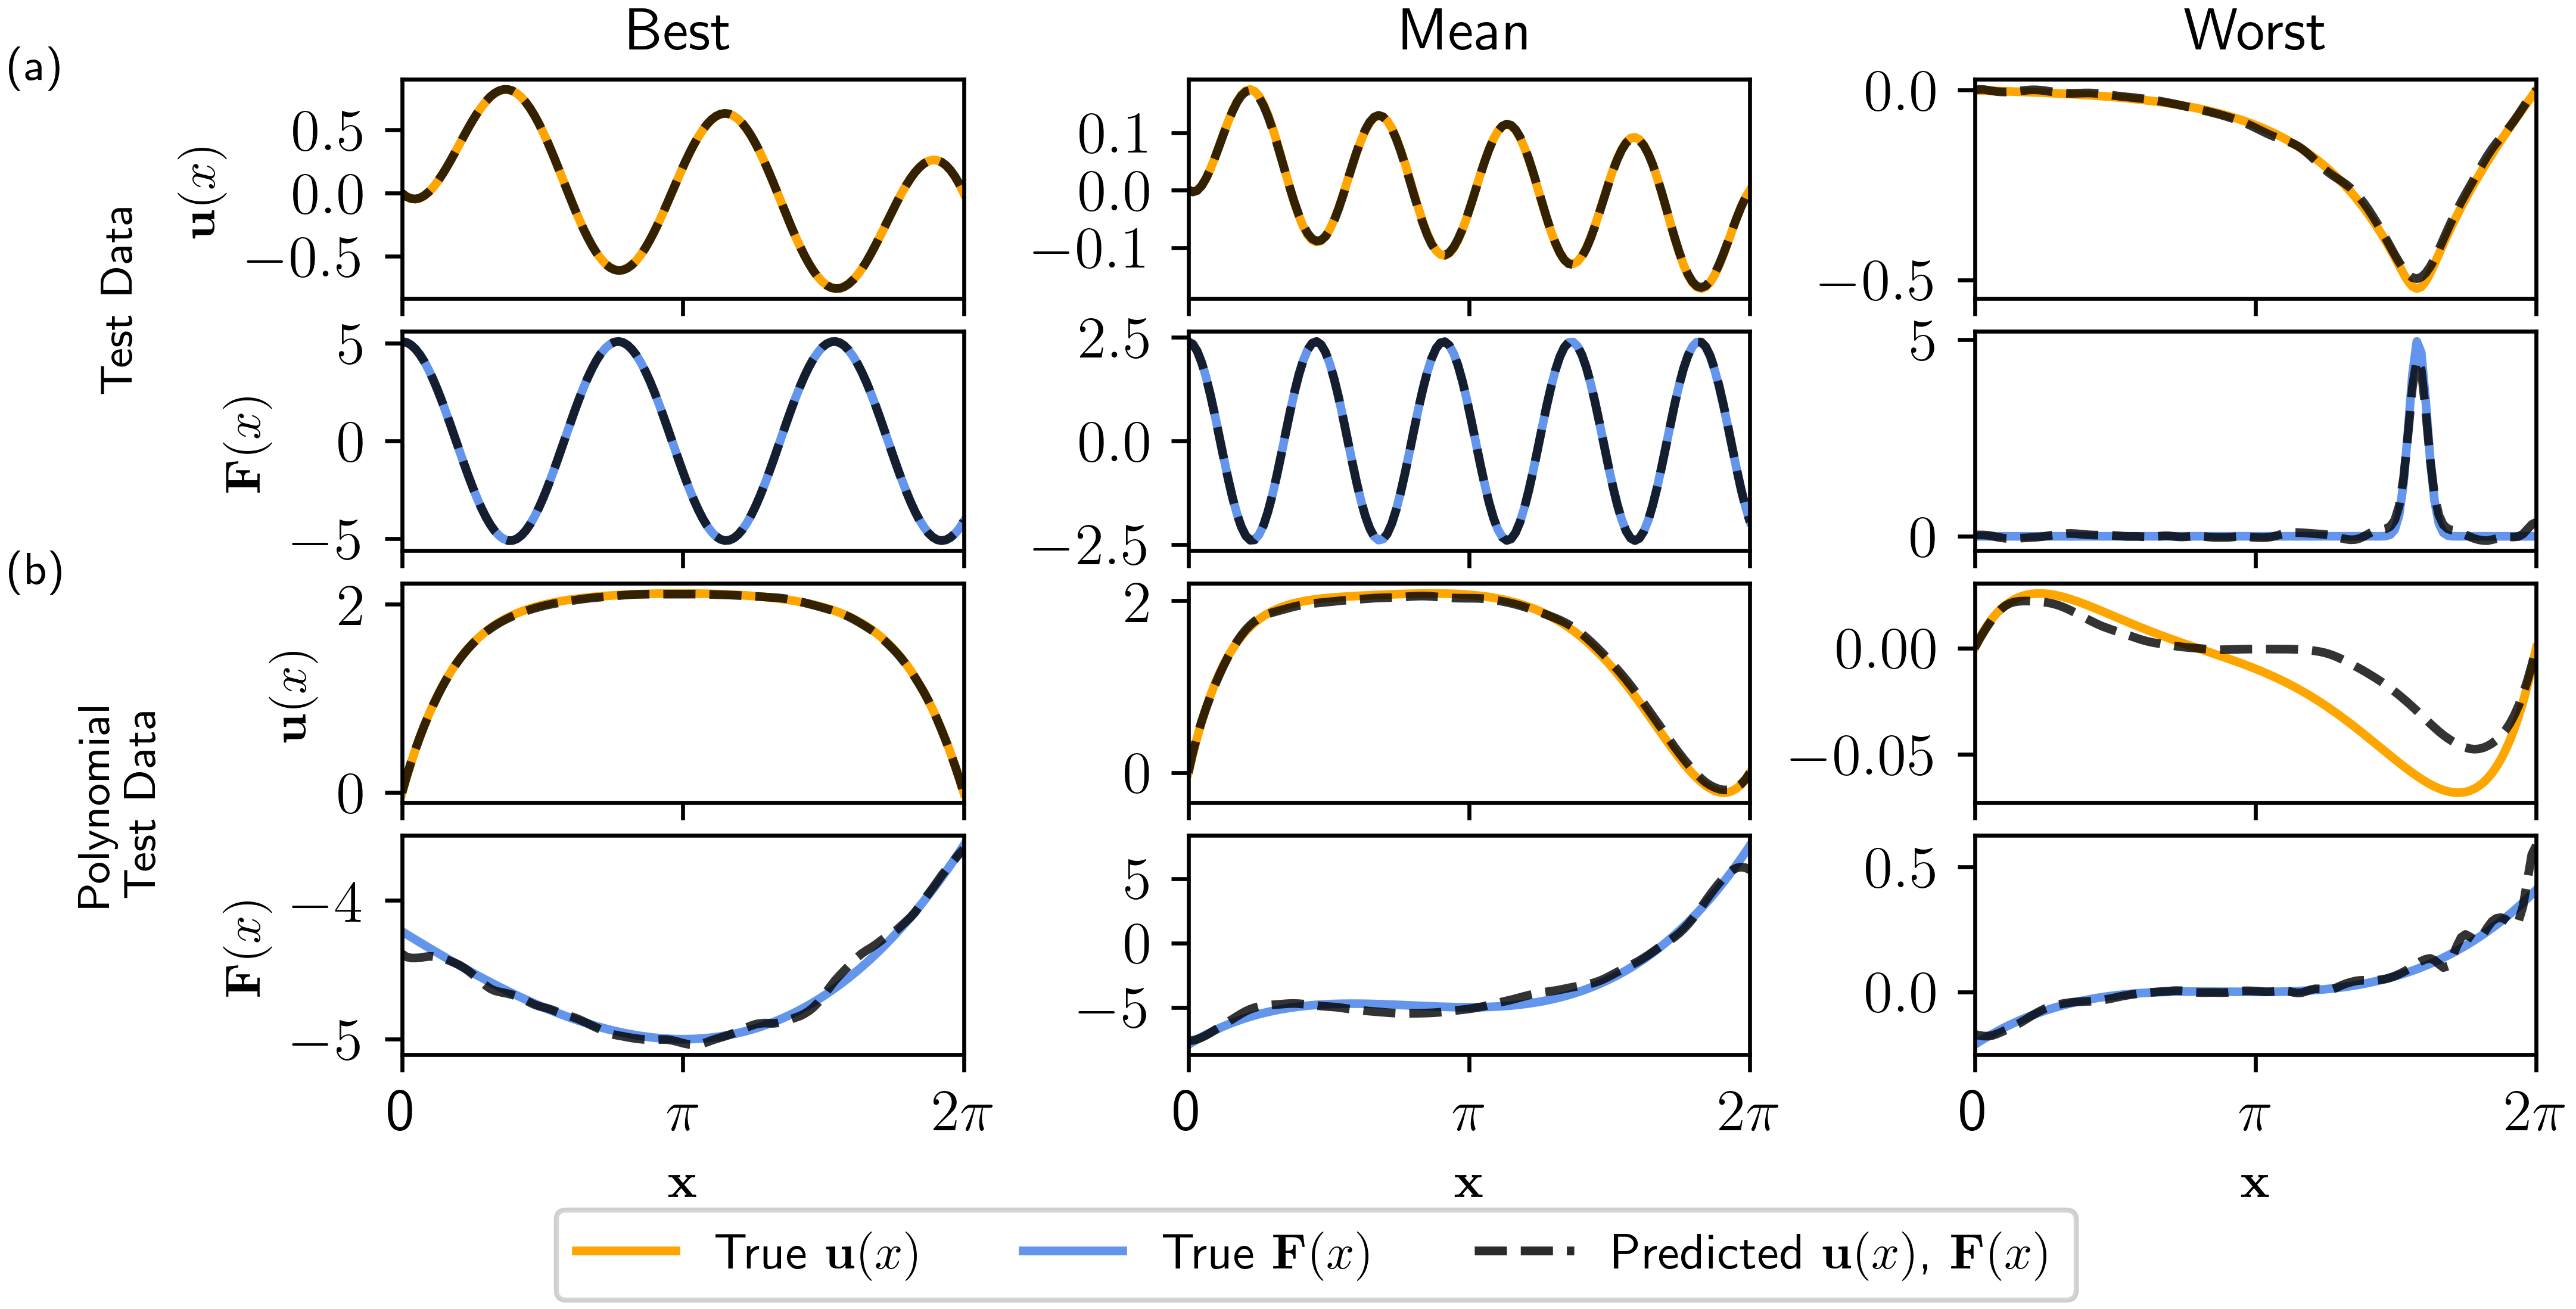

In [4]:
# Set plotting options:
plt.rcdefaults()
plot_params = full_params.copy()
plot_params['lines.linewidth'] = 1.75
plt.rcParams.update(plot_params)

######################################
## Predicted vs true plots - test 2
######################################

fig = plt.figure()
gs = fig.add_gridspec(4, 4, width_ratios=[0.2,1,1,1])
#plot_ax_opts = dict()
ax1 = [fig.add_subplot(gs[0,1]), 
       fig.add_subplot(gs[0,2]), 
       fig.add_subplot(gs[0,3])]

ax2 = [fig.add_subplot(gs[1,1], sharex=ax1[0]), 
       fig.add_subplot(gs[1,2], sharex=ax1[1]), 
       fig.add_subplot(gs[1,3], sharex=ax1[2])]

ax3 = [fig.add_subplot(gs[2,1], sharex=ax1[0]), 
       fig.add_subplot(gs[2,2], sharex=ax1[1]), 
       fig.add_subplot(gs[2,3], sharex=ax1[2])]

ax4 = [fig.add_subplot(gs[3,1], sharex=ax1[0]), 
       fig.add_subplot(gs[3,2], sharex=ax1[1]), 
       fig.add_subplot(gs[3,3], sharex=ax1[2])]

# Plot the prediction curves:
prediction_compare_plot(s0, "test1", fig=fig, axs=[ax1,ax2])
prediction_compare_plot(s0, "test2", fig=fig, axs=[ax3,ax4], label=False)


# Add labels to left label axes
ax5 = fig.add_subplot(gs[0:1,0], frameon=False)
ax6 = fig.add_subplot(gs[2:3,0], frameon=False)

props = dict(rotation=90)
text_opts = dict(weight='bold', fontsize=9, ha='center', va='center')

ax5.text(x=0.5, y=0, s="Test Data", transform=ax5.transAxes, **props, **text_opts)
ax5.text(x=-0.5, y=1, s="(a)", transform=ax5.transAxes, **letter_opts)

ax6.text(x=0.5, y=0, s="Polynomial \n Test Data", transform=ax6.transAxes, **props, **text_opts)
ax6.text(x=-0.5, y=1, s="(b)", transform=ax6.transAxes, **letter_opts)

plt.subplots_adjust(hspace=0.15, wspace=0.5)


# Turn off the shared axes' axis xlabels
for ax_list in [ax1,ax2,ax3]:
    for ax in ax_list:
        plt.setp(ax.get_xticklabels(), visible=False)

for ax in [ax5,ax6]:
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()